<a href="https://colab.research.google.com/github/satanjj10/DL_course/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

170508288/170498071 [==============================] - 13s 0us/step


In [2]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
trans = [
    "airplane",										
    "automobile",										
    "bird",										
    "cat",										
    "deer",										
    "dog",										
    "frog",										
    "horse",										
    "ship",										
    "truck",
]

答案是: airplane


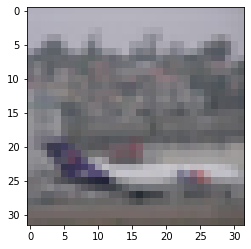

In [4]:
import matplotlib.pyplot as plt
idx = 30000
print("答案是:", trans[y_train[idx][0]])
plt.imshow(x_train[idx])

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
layers = [
    # 1 filter(3 * 3 * 3(previous depth)) * 64 + 64(bias) = 1792
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 1 filter(3 * 3 * 64(previous depth)) * 128 + 128(bias) = 73856
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Flatten(),
    # 頭重腳輕(卷積重，MLP輕)(4096 * 10 + 10 = 40970)
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 256)        0

In [6]:
# GAP: 進MLP後做平均
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Flatten
layers = [
    # 1 filter(3 * 3 * 3(previous depth)) * 64 + 64(bias) = 1792
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 1 filter(3 * 3 * 64(previous depth)) * 128 + 128(bias) = 73856
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    # 進MLP後做平均
    GlobalAveragePooling2D(),
    # 頭重腳輕(卷積重，MLP輕)(256 * 10 + 10 = 2570)
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 256)       

In [7]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer="adam",
       metrics=["accuracy"])

In [8]:
# 把圖片轉成0，1
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [9]:
# batch_size: 你看多少筆再進行一次梯度下降(5[圖片大/訓練資料少]-200[圖片小/訓練資料多])
# epochs: 全體資料(60000) 你要看幾輪(我們什麼時候要停的關鍵)
# validation_split: 測試什麼時候停下來要用沒看過的資料(val loss穩定的時候就停, 不要過擬合)
# (60000 * 0.9) / 200 -> 270
# verbose: 0(quiet) 1(full) 2(no progress bar)
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
callbacks = [
    ModelCheckpoint("cnn.h5", save_best_only=True),
    EarlyStopping(patience=10, restore_best_weights=True)
]
model.fit(x_train_norm,
     y_train,
     batch_size=200,
     epochs=50,
     validation_split=0.1,
     verbose=2,
     callbacks=callbacks)

Epoch 1/50
225/225 - 15s - loss: 1.8150 - accuracy: 0.3296 - val_loss: 1.5517 - val_accuracy: 0.4360 - 15s/epoch - 66ms/step
Epoch 2/50
225/225 - 3s - loss: 1.4943 - accuracy: 0.4627 - val_loss: 1.4308 - val_accuracy: 0.4754 - 3s/epoch - 14ms/step
Epoch 3/50
225/225 - 3s - loss: 1.3491 - accuracy: 0.5169 - val_loss: 1.2909 - val_accuracy: 0.5446 - 3s/epoch - 14ms/step
Epoch 4/50
225/225 - 3s - loss: 1.2539 - accuracy: 0.5548 - val_loss: 1.2004 - val_accuracy: 0.5786 - 3s/epoch - 14ms/step
Epoch 5/50
225/225 - 3s - loss: 1.1634 - accuracy: 0.5875 - val_loss: 1.1832 - val_accuracy: 0.5784 - 3s/epoch - 15ms/step
Epoch 6/50
225/225 - 3s - loss: 1.1015 - accuracy: 0.6113 - val_loss: 1.0715 - val_accuracy: 0.6274 - 3s/epoch - 14ms/step
Epoch 7/50
225/225 - 4s - loss: 1.0508 - accuracy: 0.6309 - val_loss: 1.0128 - val_accuracy: 0.6538 - 4s/epoch - 16ms/step
Epoch 8/50
225/225 - 3s - loss: 1.0033 - accuracy: 0.6481 - val_loss: 1.0421 - val_accuracy: 0.6298 - 3s/epoch - 15ms/step
Epoch 9/50
225

In [10]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.7237 - accuracy: 0.7531


[0.7236937284469604, 0.7530999779701233]

In [11]:
pre = model.predict(x_test_norm).argmax(axis=-1)
# 為種類數量
print(pre.shape)
# 為表格
print(y_test.shape)
# 轉為種類數量
y_test_r = y_test.reshape(10000)
print(y_test_r.shape)

(10000,)
(10000, 1)
(10000,)


In [12]:
# 雙方向(axis=1)
# 在tf用y_test_cat(十個機率), 出tf用y_test(確實答案)
import pandas as pd
from sklearn.metrics import confusion_matrix
pre = model.predict(x_test_norm).argmax(axis=-1)
mat = confusion_matrix(y_test_r, pre)
pd.DataFrame(mat,
      columns=["{}(預測)".format(trans[i]) for i in range(10)],
      index=["{}(真實)".format(trans[i]) for i in range(10)])

,airplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),ship(預測),truck(預測)
airplane(真實),726,18,35,13,19,13,15,15,116,30
automobile(真實),11,883,2,3,3,4,8,2,23,61
bird(真實),51,3,562,53,110,81,93,28,10,9
cat(真實),9,9,40,502,81,186,97,39,17,20
deer(真實),11,3,37,35,762,36,50,48,13,5
dog(真實),7,5,17,108,57,714,38,40,7,7
frog(真實),2,4,25,35,36,19,866,3,9,1
horse(真實),14,0,22,25,69,55,13,790,3,9
ship(真實),27,26,8,6,9,4,9,3,891,17
truck(真實),26,70,5,11,4,4,6,10,29,835


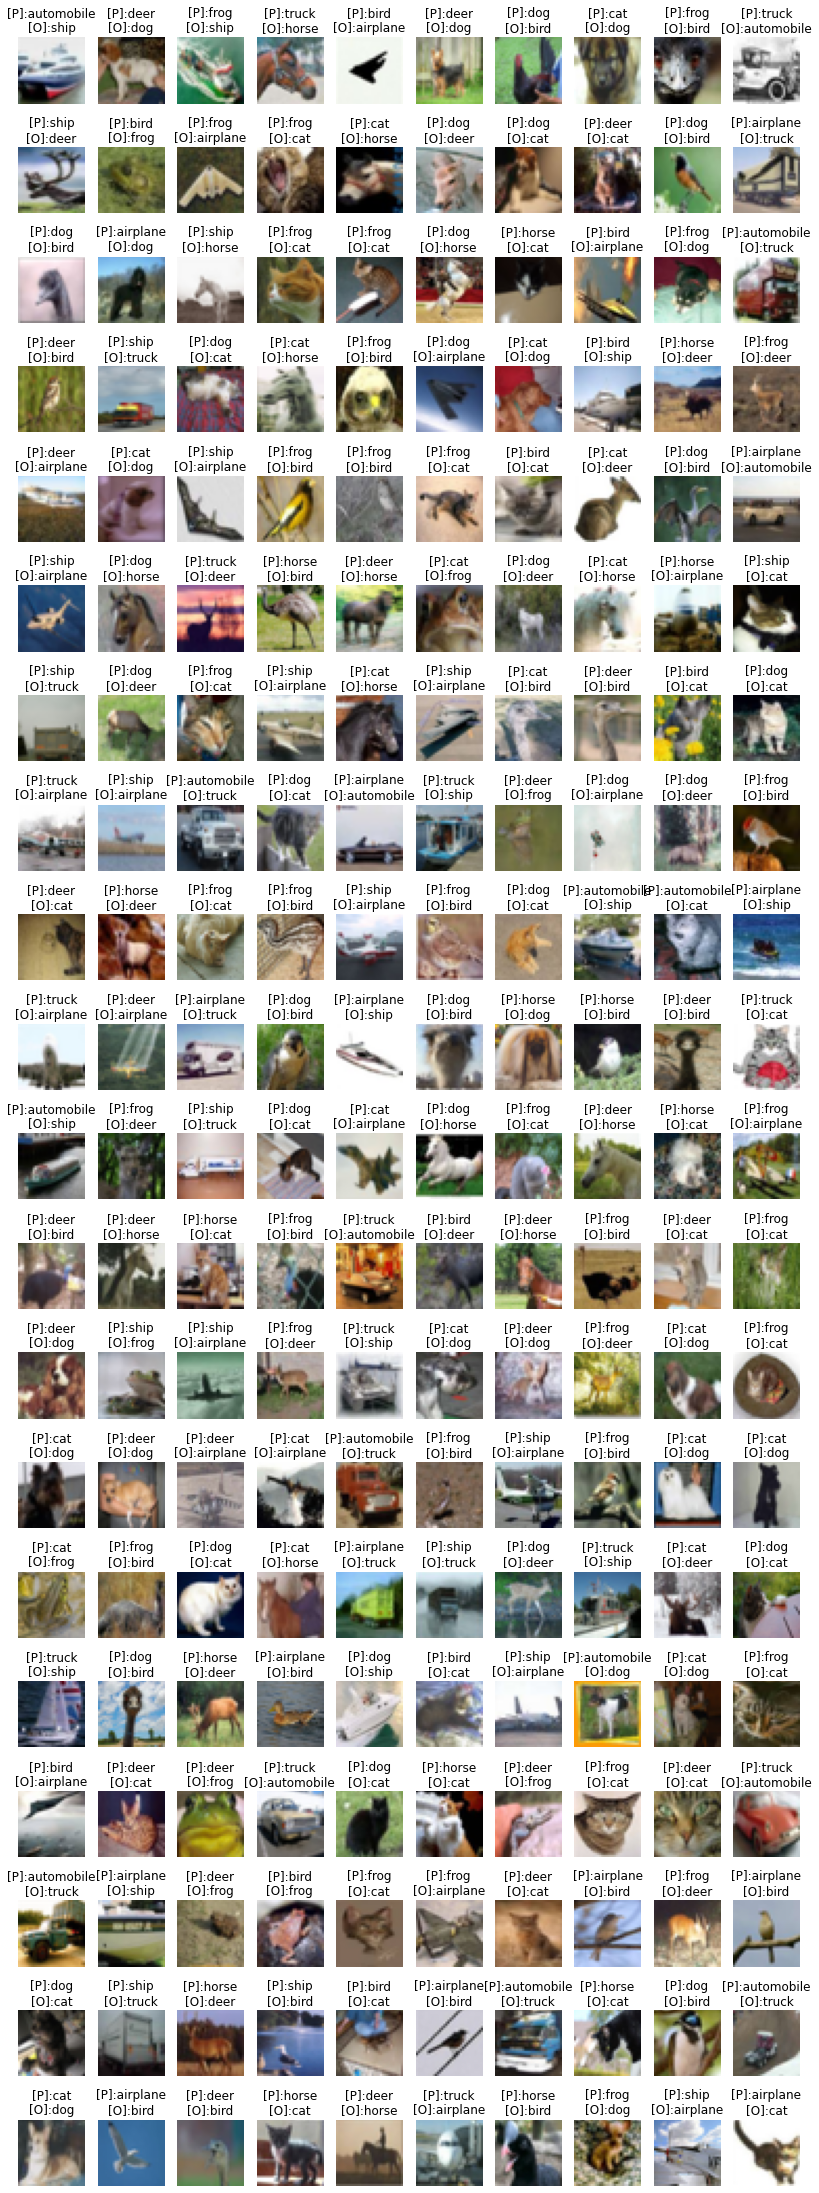

In [13]:
import numpy as np
# 預測不對的idx
# 太多了, 所以我取兩百筆就好
idx = np.nonzero(pre != y_test_r)[0][:200]
# 預測不對的圖的正確答案
pre_false_label = y_test_r[idx]
# 預測不對的圖的預測值
pre_false_pred = pre[idx]
# 預測不對的圖的原圖
pre_false_img = x_test[idx]

plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[P]:{}\n[O]:{}".format(trans[pre_false_pred[i]], trans[pre_false_label[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(pre_false_img[i])

網址:https://img.freepik.com/free-photo/airplane-sky_51195-1539.jpg?w=2000
airplane 的機率: 0.7589
automobile 的機率: 0.0
bird 的機率: 0.001
cat 的機率: 0.0
deer 的機率: 0.0003
dog 的機率: 0.0
frog 的機率: 0.0
horse 的機率: 0.0
ship 的機率: 0.2397
truck 的機率: 0.0


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


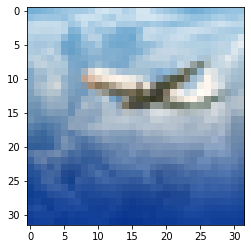

In [15]:
# PIL: pillow
import requests
from PIL import Image 
url = input("網址:")
response = requests.get(url, stream=True, verify=False)
img = Image.open(response.raw).resize((32, 32)).convert("RGB")
# 當初怎麼進去, 現在就要怎麼進去, 所以 (32, 32, 3) 和 (1, 32, 32, 3) 是不一樣的
img_np = np.array(img).reshape(1, 32, 32, 3) / 255.0
prob = model.predict(img_np)[0]
for t, p in zip(trans, prob):
    print(t, "的機率:", round(p, 4))
plt.imshow(img)

In [17]:
from tensorflow.keras.models import load_model
# 手動存檔: model.save("cnn.h5")
# 讀取模型: load_model("cnn.h5")
# 不用再compile, 可以繼續fit/predict/evaluate
model.save("/content/drive/MyDrive/機器學習/cnn.h5")

In [18]:
import os
modelpath = "/content/drive/MyDrive/機器學習/cnn.h5"
if not os.path.exists(modelpath):
    print("創造...")
    layers = [
        Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
        MaxPooling2D(),
        Conv2D(128, 3, padding="same", activation="relu"),
        MaxPooling2D(),
        Conv2D(256, 3, padding="same", activation="relu"),
        MaxPooling2D(),
        Conv2D(512, 3, padding="same", activation="relu"),
        MaxPooling2D(),
        GlobalAveragePooling2D(),
        Dense(10, activation="softmax")
    ]
    model = Sequential(layers)
    model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer="adam",
       metrics=["accuracy"])
else:
    print("讀取...")
    model = load_model(modelpath)
model.summary()

讀取...
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 256) 